<img src="1wXDt9n6vnw.jpg">

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import math
%matplotlib inline


In [3]:
def show_graph(matrix):
    edge_list = []
    for vertex in matrix:
        for sub_vertex in vertex:
            if not(sub_vertex == 0) and not(sub_vertex == math.inf):
                edge_list.add()

In [4]:
def init_graph():
    adjacency_matrix = [[math.inf]]
    return adjacency_matrix

In [5]:
def add_vertex(adjacency_matrix):
    for item in adjacency_matrix:
        item.append(math.inf)
    new_line = [math.inf for i in range(len(adjacency_matrix[0]) - 1)] + [math.inf]
    adjacency_matrix.append(new_line)
    return adjacency_matrix

In [6]:
#Считаем, что граф !НАПРАВЛЕННЫЙ#
def add_edge(vertex1, vertex2, weight, matrix):
    matrix[vertex1][vertex2] = matrix[vertex2][vertex1] = weight

In [7]:
def fill_matrix(inp, size):
    
    matrix = init_graph()
    for i in range(size - 1):
        add_vertex(matrix)
        
    adges = inp.split(', ')
    for i in adges:
        num = ''
        j = len(i) - 1
        while j > 0:
            if i[j].isnumeric():
                num = i[j] + num
            else:
                break
            j -= 1
        #print('added adge ({}; {}), weight = {}'.format(int(i[3]) - 1, int(i[6]) - 1, int(num) ))
        matrix[int(i[3]) - 1][int(i[6]) -1] = matrix[int(i[6]) -1][int(i[3]) - 1] = int(num)
        
        
    return matrix




In [8]:
def floyd(matrix):
    next_v = [ [math.inf for i in range(len(matrix))] for i in range(len(matrix))]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf: 
                next_v[i][j] = j
                next_v[j][i] = i
            
    d = matrix.copy()
    #print(d)
    n = len(matrix) 
    for k in range (0 , n):
        for i in range (0 , n):
            for j in range (0 , n):
               # print(' {} <> {}'.format( d[k][j], (d[k][i] + d[i][j]) ))
                #print(' {}; {} vs ({}; {}) + ({}; {}) '.format(k, j, k, i, i, j))
                if k != j and k != i and i != j:
                    if d[k][j] > d[k][i] + d[i][j]:

                        next_v[k][j] = i
                        next_v[j][k] = i
                    d[k][j] = d[j][k] = min(d[k][j], (d[k][i] + d[i][j]))
                
    return d, next_v
            

In [15]:
def getShortestPath(u, v, next_v, d):
    u -= 1
    v -= 1
    print('len = ', d[u][v])
    if d[u][v] == math.inf:
        print( "No path found")                 
    c = u
   
    while c != v:
        print (c + 1, end = ' -> ')
        c = next_v[c][v]
    print (v + 1)
    

In [41]:
def Dijkstra(N, S, matrix):
    S = S - 1
    valid = [True]*N        
    weight = [1000000]*N
    weight[S] = 0
    for i in range(N):
        min_weight = 1000001
        ID_min_weight = -1
        for i in range(len(weight)):
            if valid[i] and weight[i] < min_weight:
                min_weight = weight[i]
                ID_min_weight = i
        for i in range(N):
            if weight[ID_min_weight] + matrix[ID_min_weight][i] < weight[i]:
                weight[i] = weight[ID_min_weight] + matrix[ID_min_weight][i]
        valid[ID_min_weight] = False
    return weight

FLOYD-WORSHEL

In [42]:
inp = 'w(v1,v3) = 16, w(v1,v5)=12, w(v1,v6)=6, w(v1,v8)=13, w(v2,v3)=18, w(v2,v4)=23, w(v2,v6)=17, w(v3,v5)=29, w(v3,v6)=31, w(v4,v6)=27, w(v4,v7)=3, w(v5,v6)=24, w(v6,v7)=2, w(v6,v8)=1' 
matrix = fill_matrix(inp, 8)
for i in matrix:
    print (i)


[inf, inf, 16, inf, 12, 6, inf, 13]
[inf, inf, 18, 23, inf, 17, inf, inf]
[16, 18, inf, inf, 29, 31, inf, inf]
[inf, 23, inf, inf, inf, 27, 3, inf]
[12, inf, 29, inf, inf, 24, inf, inf]
[6, 17, 31, 27, 24, inf, 2, 1]
[inf, inf, inf, 3, inf, 2, inf, inf]
[13, inf, inf, inf, inf, 1, inf, inf]


In [43]:
dist, next_v = (floyd(matrix))
for i in dist:
    print(i)

[inf, 23, 16, 11, 12, 6, 8, 7]
[23, inf, 18, 22, 35, 17, 19, 18]
[16, 18, inf, 27, 28, 22, 24, 23]
[11, 22, 27, inf, 23, 5, 3, 6]
[12, 35, 28, 23, inf, 18, 20, 19]
[6, 17, 22, 5, 18, inf, 2, 1]
[8, 19, 24, 3, 20, 2, inf, 3]
[7, 18, 23, 6, 19, 1, 3, inf]


In [44]:
getShortestPath(7, 8, next_v, dist)

len =  3
7 -> 6 -> 8


In [45]:
Dijkstra(8, 7, matrix)

[8, 19, 24, 3, 20, 2, 0, 3]

In [30]:
matrix = fill_matrix(inp, 8)
for i in range(len(matrix)):
    for j in range(len(matrix)):
        if matrix[i][j] == math.inf:
            matrix[i][j] = 0
        #print(i, ' ', j)
        #print(matrix[i][j])
matrix

[[0, 0, 16, 0, 12, 6, 0, 13],
 [0, 0, 18, 23, 0, 17, 0, 0],
 [16, 18, 0, 0, 29, 31, 0, 0],
 [0, 23, 0, 0, 0, 27, 3, 0],
 [12, 0, 29, 0, 0, 24, 0, 0],
 [6, 17, 31, 27, 24, 0, 2, 1],
 [0, 0, 0, 3, 0, 2, 0, 0],
 [13, 0, 0, 0, 0, 1, 0, 0]]

/usr/local/lib/python3.7/site-packages/networkx/drawing/layout.py:526: RuntimeWarning: invalid value encountered in less
  length = np.where(length < 0.01, 0.1, length)


NameError: name 'labels' is not defined

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


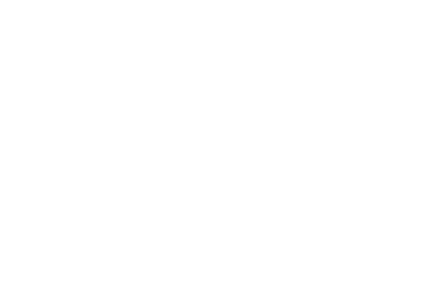

In [54]:
G = nx.from_numpy_matrix(np.array(matrix)) 
pos = nx.spring_layout(G) 

nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
#edge_labels=nx.draw_networkx_edge_labels(G,pos=nx.spring_layout(G))
#nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)